# Lab 2 — Exploring Image Data
### by Eddie Diaz and Noah Barnard

## Chosen Dataset
https://www.v7labs.com/open-datasets/multiple-pose-human-body-database

## Business Understanding

This dataset was made by v7 Labs for the purpose of training machines to identify various qualities of people. The range of ML predictive capabilities using this dataset include poses, activities, gender, body type, and more. Third parties who build recognition software would benefit from these machine learning algorithms because they allow for software to identify the user, his/her features, and whichever activity they are performing. 

One particular task that could be interesting is the ability for machines to gauge proper form at the gym. Although working out is crucial for long-term health, repeating incorrect movement patterns can be very detrimental. For instance, someone that performs deadlifts while bending their spine could develop chronic back problems over time. A technology-enabled tool that prevents these problems and offers corrective feedback could therefore prove highly beneficial to many people. Furthermore, by comparing a particular exercise to a dataset with both proper and improper form, it should be relatively easy for the machine to pick up on incorrect patterns with only average performance.

However, this task is beyond the scope of this assignment. For now, we want to build a simple algorithm that can determine whether a person is performing physical activity. We feel like this is a good start. Also, for the sake of simplicity, we will only iterate over the first 1000 items, as this dataset contains for 25,000 pictures. As these images seem to be in no particular order, a simple cutoff at 1000 seems appropriate.

## Data Preparation

To begin working with image data, I will first improt our dependencies, load the images as a numpy array,and edit the image as necessary. 

Working with 1000 images
Image examples: 
00047.jpg


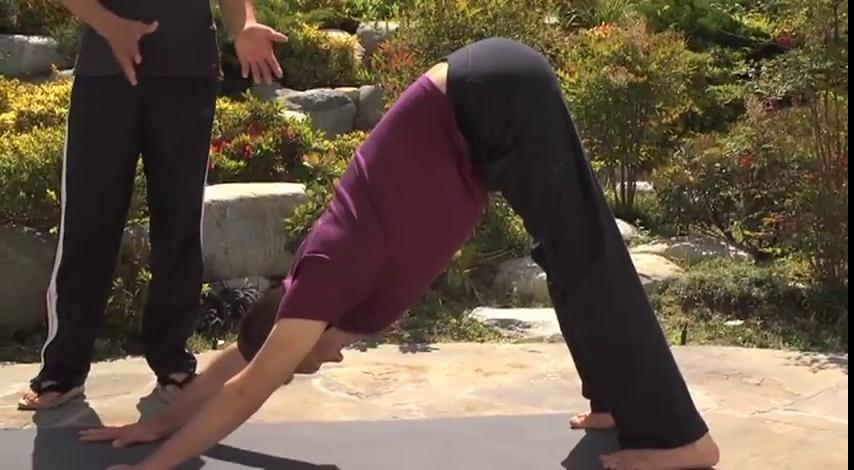

00721.jpg


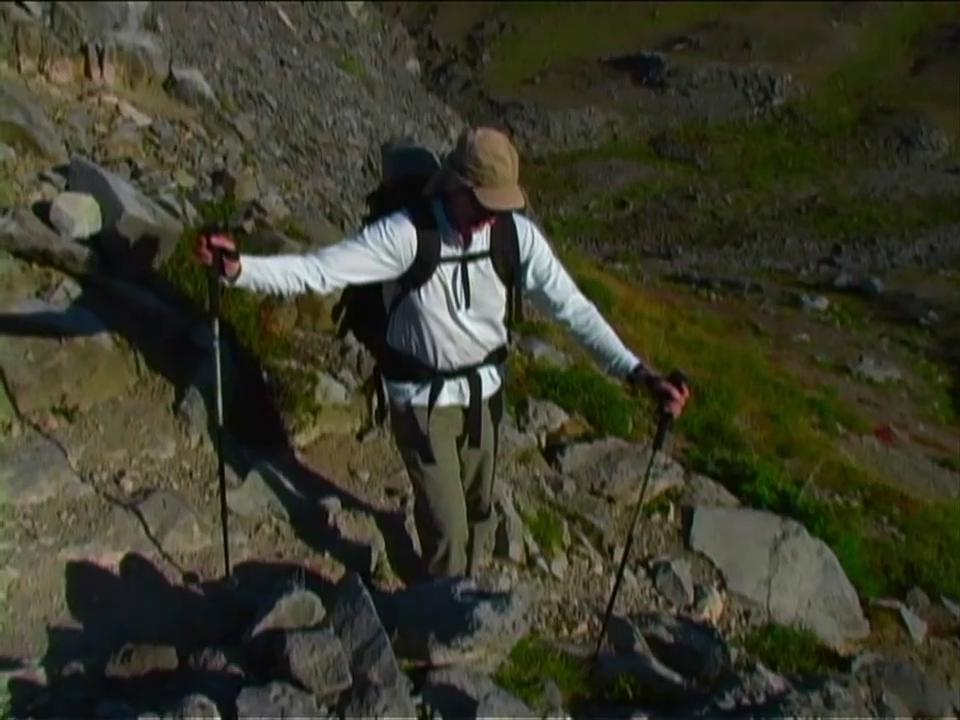

In [2]:
## import based on https://www.kaggle.com/code/lgmoneda/from-image-files-to-numpy-arrays/notebook

import numpy as np
import pandas as pd
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

folder = "./dataset"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

Ok, we got visuals. Let's turn these into numpy arrays, and import them into a pandas dataframe for table use.

  image_name                                         image_data
1  00132.jpg  [[0.9124183006535947, 0.9124183006535947, 0.91...
2  00654.jpg  [[0.9947712418300654, 0.9947712418300654, 0.99...
3  00640.jpg  [[0.19084967320261437, 0.19477124183006533, 0....
4  00898.jpg  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5  00126.jpg  [[0.03529411764705882, 0.03529411764705882, 0....


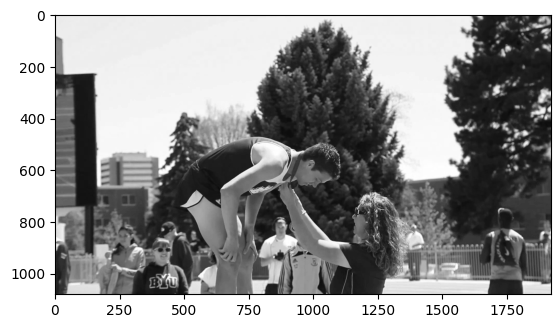

In [23]:
# The following code imports the images as numpy arrays and appends them into another array
# Custom code by Eddie, inspired by this youtube vid https://www.youtube.com/watch?v=bIOMZK5e0Oo
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

# create an empty array for 1000 image objects
images = pd.DataFrame(columns=["image_name", "image_data"])
id = 0

# import and simplify images as numpy arrays within  a larger array
for file in os.listdir(folder):
    id += 1
    img = imread(os.path.join(folder, file))
    img = img.astype(np.uint8)
    img = img/255
    img = img.mean(axis=2)
    images.loc[id] = {"image_name": file, "image_data": img}

print(images.head())
plt.imshow(images.iloc[0]["image_data"], cmap="gray")


## Data Reduction

Fist, we'll conduct PCA

In [ ]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

plot_explained_variance(pca)